In [23]:
results="/sharedFolder/Results/Hotspot/Revision1/Idelalisib/FULL"
previousResults="/sharedFolder/Results/Hotspot/Revision1/FULL/5/"
path="/sharedFolder/Data/1_HTGTS/13_Revision1/"
res2=paste(results,"HotspotIDList/",sep="")


hotspotpath=previousResults

plots=paste(results,"/rpmPlot/",sep="")
dir.create(plots)
# centering with 'scale()'
center_scale <- function(x) {
    scale(x, scale = FALSE)
}
library("pheatmap")
library("vioplot")
library("ggVennDiagram");
library("ggplot2")
library("GenomicRanges")
rider2="/sharedFolder/rider/RIDER_v0.2.jar"
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
gg=GRanges(seqnames=as.matrix(Database[,1]),ranges=IRanges(start = as.numeric(Database[,2]),end=as.numeric(Database[,3])))    
library(eulerr)


Warning message in dir.create(plots):
“'/sharedFolder/Results/Hotspot/Revision1/Idelalisib/FULL/rpmPlot' already exists”


In [2]:
filePlots=list.files(plots,pattern=".csv")
len <- 3
toRemoveList <- vector(mode = "list", length = len)
names(toRemoveList)=filePlots

a=list.files(path)[grep("Idelalisib",list.files(path))]
b=list.dirs(hotspotpath,recursive=FALSE)
b=b[grep("Idelalisib",b)]

conditions=c("DMSO","Taze","Vale")
dir.create(paste(plots,"filtered",sep="/"))

for(i in conditions){
    oneFile=a[grep(i,a)]
    oneFileS=b[grep(i,b)]
    pathone=list.dirs(oneFileS,recursive=FALSE)
    oneFileS=list.files(list.dirs(oneFileS,recursive=FALSE),pattern="bed")
    oneFileS=paste(pathone,oneFileS,sep="/")
    for(j in conditions){
        if(!((i=="Taze" && j =="Vale") || (j=="Taze" && i =="Vale"))){
        twoFile=a[grep(j,a)]
        twoFileS=b[grep(j,b)]
        pathtwo=list.dirs(twoFileS,recursive=FALSE)
        twoFileS=list.files(list.dirs(twoFileS,recursive=FALSE),pattern="bed")
        twoFileS=paste(pathtwo,twoFileS,sep="/")
        if(i!=j){
            count=intersect(grep(i,names(toRemoveList)),grep(j,names(toRemoveList)))
            toRemove=c()
            rpmPlot=read.table(paste(plots,"/",intersect(filePlots[grep(i,filePlots)],filePlots[grep(j,filePlots)]),sep=""),header=TRUE,sep=",",row.names=1)
            system(paste("java -jar ",rider2," -task ValSite -s_file ",oneFileS," ",twoFileS," -e_file ",path,"/",oneFile," -c_file ",path,"/",twoFile," -genome hg38 -out_dir ",plots,"/",i,"_",j,sep=""))
            system(paste("chmod -R 777 ",plots,"/",i,"_",j,sep=""))
            compare=read.table(paste(plots,"/",i,"_",j,"/",list.files(paste(plots,"/",i,"_",j,sep=""),pattern=".txt"),sep=""),header=TRUE,sep="\t")
            for(n in which(compare[,16]>0.05)){
                tempGG=GRanges(seqnames=as.matrix(compare[n,2]),ranges=IRanges(start = as.numeric(compare[n,3]),end=as.numeric(compare[n,4])))    
                toRemove=append(toRemove,unique(Database[findOverlaps(tempGG,gg)@to,7]))
                }
            toRemove=intersect(sapply(toRemove,FUN=toString),rownames(rpmPlot))
            print(count)
            print(toRemove)
            if(length(toRemoveList[[count]])==0){
            toRemoveList[[count]]=append(toRemoveList[[count]],toRemove)
            }else{
            toRemoveList[[count]]=intersect(toRemoveList[[count]],toRemove)
        }
            }
    }
    }

}

for(i in filePlots){
rpmPlot=read.table(paste(plots,"/",i,sep=""),header=TRUE,sep=",",row.names=1)
rpmPlot=rpmPlot[!(row.names(rpmPlot) %in% toRemoveList[[i]]),]
write.table(rpmPlot,paste(plots,"/filtered/filtered_",i,sep=""),col.names=NA,sep=",")
}

Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”


[1] 1
 [1] "132" "89"  "135" "136" "137" "116" "117" "118" "119" "120" "144" "96" 
[13] "147" "149" "152" "156" "129" "108"


Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”


[1] 2
 [1] "131" "132" "89"  "133" "135" "136" "137" "139" "141" "142" "143" "144"
[13] "96"  "147" "148" "149" "151" "152" "156" "157" "108"


Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objec

[1] 1
 [1] "132" "89"  "133" "135" "136" "137" "116" "117" "119" "144" "96"  "147"
[13] "149" "151" "152" "156" "129" "108"


Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Warning message in .Seqinfo.mergexy(x, y):
“The 2 combined objec

[1] 2
 [1] "131" "89"  "133" "135" "136" "137" "139" "141" "142" "143" "144" "96" 
[13] "147" "148" "149" "151" "152" "157" "129" "108"


In [3]:
#Venn diagram plot. Check how many hotspot are in common
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
types=c("Idelalisib")
conditions=c("DMSO","Taze","Vale")
for(j in types){
subBase=Database[grep(j,Database[,6]),]
x <- list()
count=1
for(i in conditions){
x[[count]]=subBase[grep(i,subBase[,6]),7]
count=count+1
}
names(x)=conditions
system("echo yeah")
}
jjj=(unlist(x))
j2=x



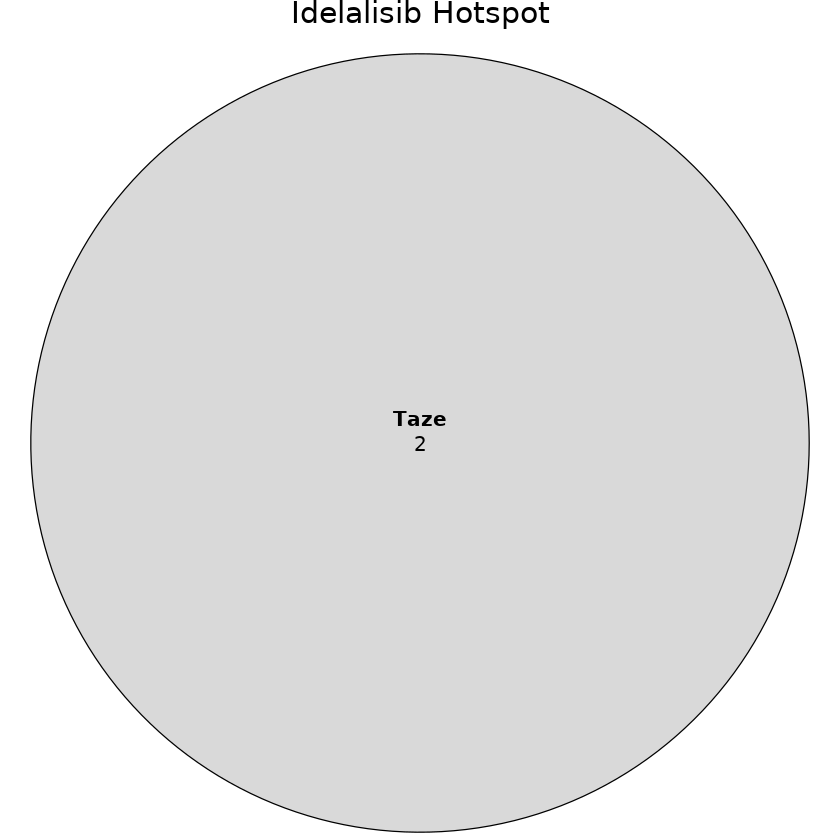

In [4]:
mj2=list()
count=1
a=as.matrix(read.table(paste(results,"rpm_hgtgtsHeatmap.csv",sep="/"),header=TRUE,row.names=1,sep=","))
a2=as.matrix(read.table(paste(results,"/rpmPlot/filtered/filtered_Ide_DMSOTaze.csv",sep=""),sep=",",header=TRUE,row.names=1))
temp=a[sapply(setdiff(j2$DMSO,j2$Taze),toString),c(1,2)]
if(length(temp)>2){
temp=temp[sort(temp[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}
temp2=a[sapply(intersect(j2$DMSO,j2$Taze),toString),c(1,2)]
if(length(temp2)>2){
temp2=temp2[sort(temp2[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}
temp3=a[sapply(setdiff(j2$Taze,j2$DMSO),toString),c(1,2)]
if(length(temp3)>2){
temp3=temp3[sort(temp3[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}

mj2[[count]]=temp[intersect(rownames(a2),rownames(temp)),]
count=count+1
mj2[[count]]=temp2[intersect(rownames(a2),rownames(temp2)),]

count=count+1
mj2[[count]]=temp3[intersect(rownames(a2),rownames(temp3)),]

xTaze=list()
xTaze[[1]]=union(rownames(mj2[[1]]),rownames(mj2[[2]]))
xTaze[[2]]=union(rownames(mj2[[2]]),rownames(mj2[[3]]))
names(xTaze)=c("DMSO","Taze")

j3=xTaze

fit1 <- euler(c("DMSO" = length(setdiff(j3$DMSO,j3$Taze)), "Taze" = length(setdiff(j3$Taze,j3$DMSO)),"DMSO&Taze"=length(intersect(j3$DMSO,j3$Taze)) ))
plot(fit1,quantities = TRUE,main="Idelalisib Hotspot")



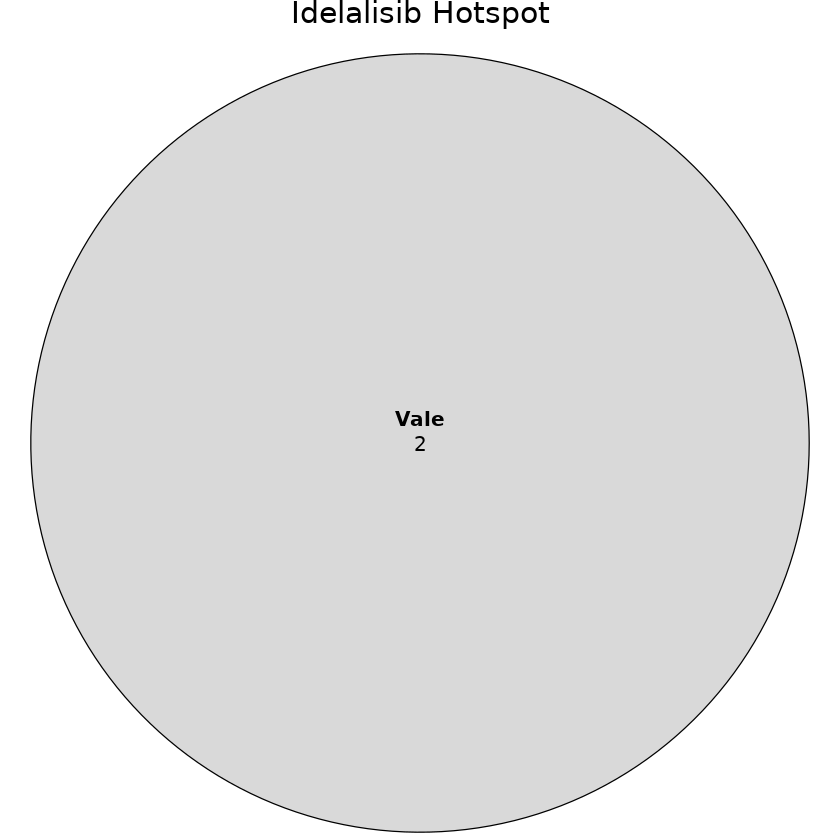

In [5]:
count=count+1



temp=a[sapply(setdiff(j2$DMSO,j2$Vale),toString),c(1,3)]
if(length(temp)>2){
temp=temp[sort(temp[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}
temp2=a[sapply(intersect(j2$DMSO,j2$Vale),toString),c(1,3)]
if(length(temp2)>2){
temp2=temp2[sort(temp2[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}
temp3=a[sapply(setdiff(j2$Vale,j2$DMSO),toString),c(1,3)]
if(length(temp3)>2){
temp3=temp3[sort(temp3[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}

a2=as.matrix(read.table(paste(results,"/rpmPlot/filtered/filtered_Ide_DMSOVale.csv",sep=""),sep=",",header=TRUE,row.names=1))

mj2[[count]]=temp[intersect(rownames(a2),rownames(temp)),]
count=count+1
mj2[[count]]=temp2[intersect(rownames(a2),rownames(temp2)),]

count=count+1
mj2[[count]]=temp3[intersect(rownames(a2),rownames(temp3)),]
xVale=list()
xVale[[1]]=union(rownames(mj2[[1+3]]),rownames(mj2[[2+3]]))
xVale[[2]]=union(rownames(mj2[[2+3]]),rownames(mj2[[3+3]]))
names(xVale)=c("DMSO","Vale")
j3=xVale

fit1 <- euler(c("DMSO" = length(setdiff(j3$DMSO,j3$Vale)), "Vale" = length(setdiff(j3$Vale,j3$DMSO)),"DMSO&Vale"=length(intersect(j3$DMSO,j3$Vale)) ))
plot(fit1,quantities = TRUE,main="Idelalisib Hotspot")
 

In [6]:
write.table(unique(union(xTaze$DMSO,xTaze$Taze)),paste(res2,"/TazeFiltered.csv",sep=""),col.names=FALSE,row.names=FALSE)
write.table(unique(union(xVale$Vale,xVale$DMSO)),paste(res2,"/ValeFiltered.csv",sep=""),col.names=FALSE,row.names=FALSE)
write.table(intersect(xTaze$DMSO,xTaze$Taze),paste(res2,"/TAZEcommonFiltered.csv",sep=""),col.names=FALSE,row.names=FALSE)
write.table(intersect(xVale$DMSO,xVale$Vale),paste(res2,"/VALEcommonFiltered.csv",sep=""),col.names=FALSE,row.names=FALSE)

In [7]:
j3

$DMSO
NULL

$Vale
[1] "156" "132"

Warning message in colSums(id & !empty) == 0 | merged_sets:
“longer object length is not a multiple of shorter object length”


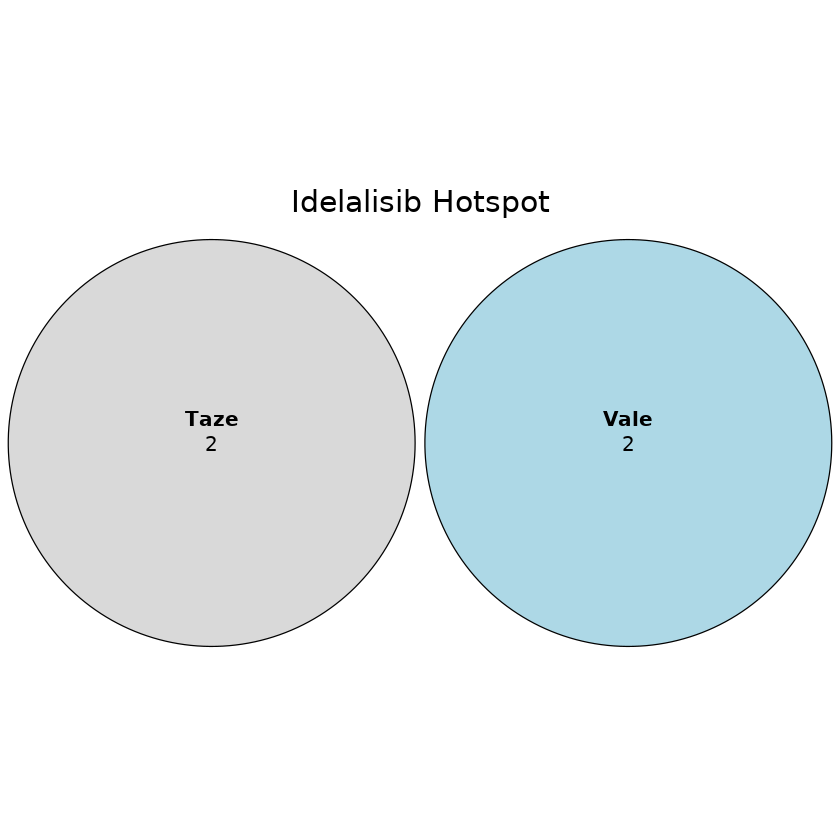

In [8]:
j2Filtered=list(union(xTaze$DMSO,xVale$DMSO),xTaze$Taze,xVale$Vale)
 names(j2Filtered)=c("DMSO","Taze","Vale")
fit1 <- euler(c("DMSO" = length(setdiff(setdiff(j2Filtered$DMSO,j2Filtered$Taze),j2Filtered$Vale)), "Taze" = length(setdiff(setdiff(j2Filtered$Taze,j2Filtered$DMSO),j2Filtered$Vale)), "Vale" = length(setdiff(setdiff(j2Filtered$Vale,j2Filtered$Taze),j2Filtered$DMSO)),"DMSO&Taze&Vale"=length(intersect(intersect(j2Filtered$DMSO,j2Filtered$Taze),j2Filtered$Vale)),"DMSO&Taze"=length(setdiff(intersect(j2Filtered$DMSO,j2Filtered$Taze),j2Filtered$Vale)),"DMSO&Vale"=length(setdiff(intersect(j2Filtered$DMSO,j2Filtered$Vale),j2Filtered$Taze)),"Taze&Vale"=length(setdiff(intersect(j2Filtered$Taze,j2Filtered$Vale),j2Filtered$DMSO)) ))
plot(fit1,quantities = TRUE,main="Idelalisib Hotspot")

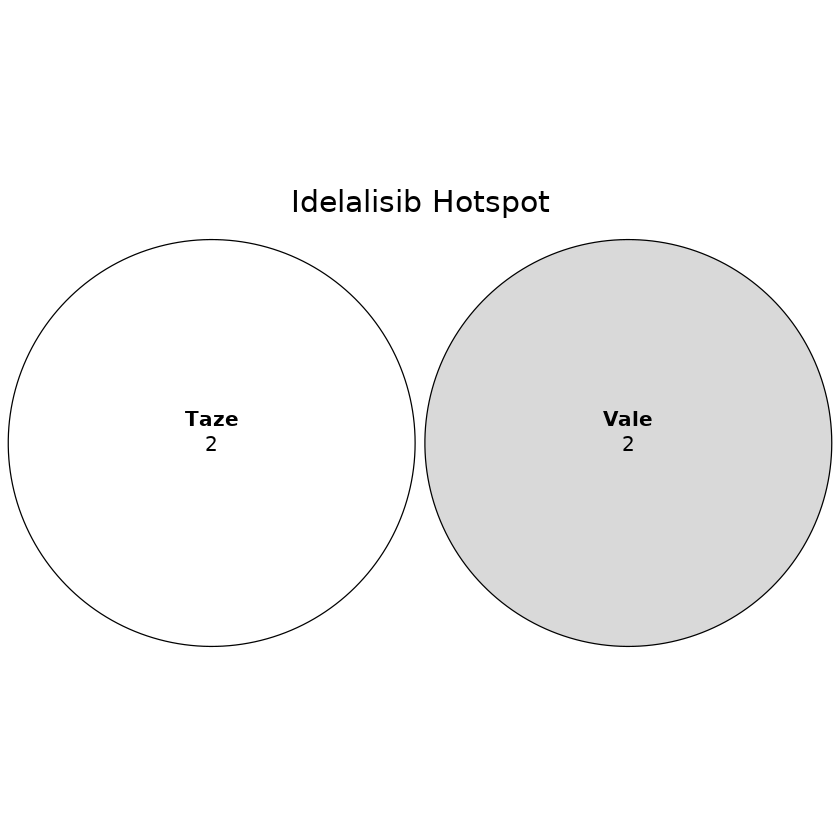

In [9]:
fit1 <- euler(c("Taze" = length(setdiff(j2Filtered$Taze,j2Filtered$Vale)), "Vale" = length(setdiff(j2Filtered$Vale,j2Filtered$Taze)),"Taze&Vale"=length(intersect(j2Filtered$Vale,j2Filtered$Taze)) ))
plot(fit1,quantities = TRUE,main="Idelalisib Hotspot")

In [10]:
j2Filtered

$DMSO
NULL

$Taze
[1] "120" "118"

$Vale
[1] "156" "132"

In [11]:
tj=c(length(j2Filtered$DMSO),length(j2Filtered$Taze),length(j2Filtered$Vale))
names(tj)=c("DMSO","Taze","Vale")
write.table(tj,paste(results,"/rpmPlot/filtered/barplot.csv",sep=""),col.names=NA)

In [12]:
names(mj2)=c("DMSO_spec_vsTaze","DMSO_TAZE","TazeSPec","DMSO_spec_vsVale","DMSOVale","ValeSpec")
dir.create(paste(results,"/rpmPlot/filtered/sortNames/",sep=""))
for(i in seq(length(mj2))){
write.table(rownames(mj2[[i]]),paste(results,"/rpmPlot/filtered/sortNames/_",i,"_",names(mj2)[i],".csv",sep=""),col.names=FALSE,row.names=FALSE)
}

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


ERROR: Error in t(as.matrix(mj2[[i + 3]]))[, 2]: subscript out of bounds


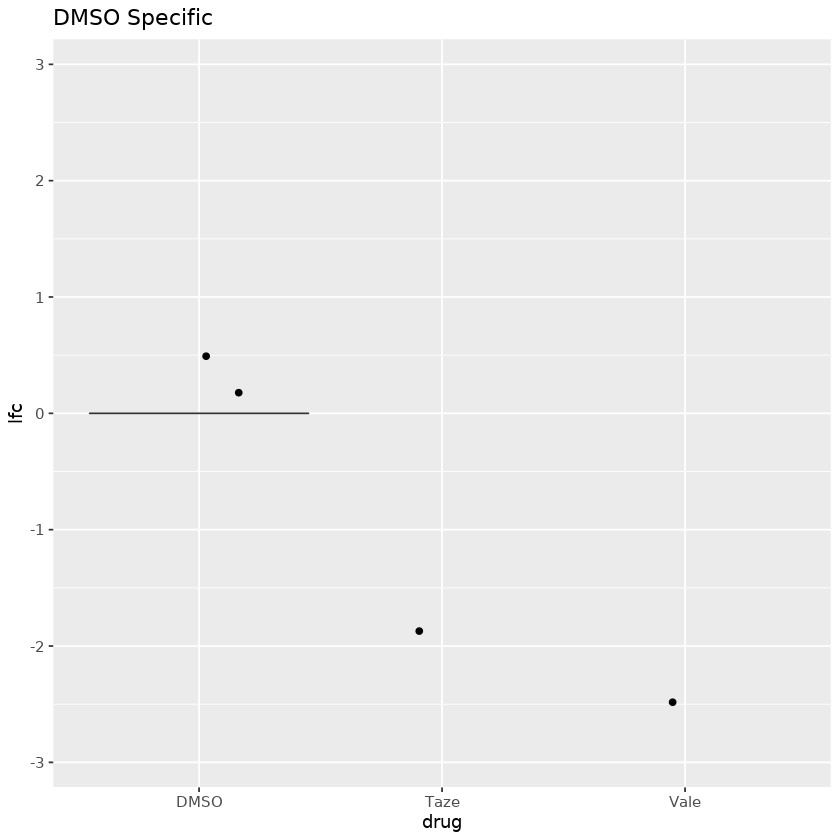

In [13]:
nn=c("DMSO Specific","HTGTS LogFoldChange AID Dependent Common Filtered","Specific")
countnn=1

for(i in seq(count/2)){
foldChange=list()
foldChange[[1]]=log2((t(as.matrix(mj2[[i]]))[,2]+0.000001)/(t(as.matrix(mj2[[i]]))[,1]+0.000001))
foldChange[[2]]=log2((t(as.matrix(mj2[[i+3]]))[,2]+0.000001)/(t(as.matrix(mj2[[i+3]]))[,1]+0.000001))
    names(foldChange)=c(colnames(mj2[[i]])[2],colnames(mj2[[i+3]])[2])
        lim=max(abs(foldChange[[1]]),abs(foldChange[[2]]))
    #FIGO
foldChangeDF=cbind(foldChange[[1]],rep("Taze",length(foldChange[[1]])))
foldChangeDF=rbind(foldChangeDF,cbind(foldChange[[2]],rep("Vale",length(foldChange[[2]]))))
    foldChangeDF=rbind(foldChangeDF,cbind(0,rep("DMSO",length(unique(c(names(foldChange[[1]]),names(foldChange[[2]])))))))

colnames(foldChangeDF)=c("lfc","drug")
foldChangeDF=data.frame(foldChangeDF)
foldChangeDF$lfc=as.numeric(foldChangeDF$lfc)

pp=ggplot(foldChangeDF,aes(x=drug,y=lfc,fill=drug)) +
geom_violin(alpha = 0.5) +
geom_point(position = position_jitter(seed = 1, width = 0.2)) +
theme(legend.position = "none") + ylim(-lim,lim) + ggtitle(nn[countnn])
plot(pp)    
    
    countnn=countnn+1
}





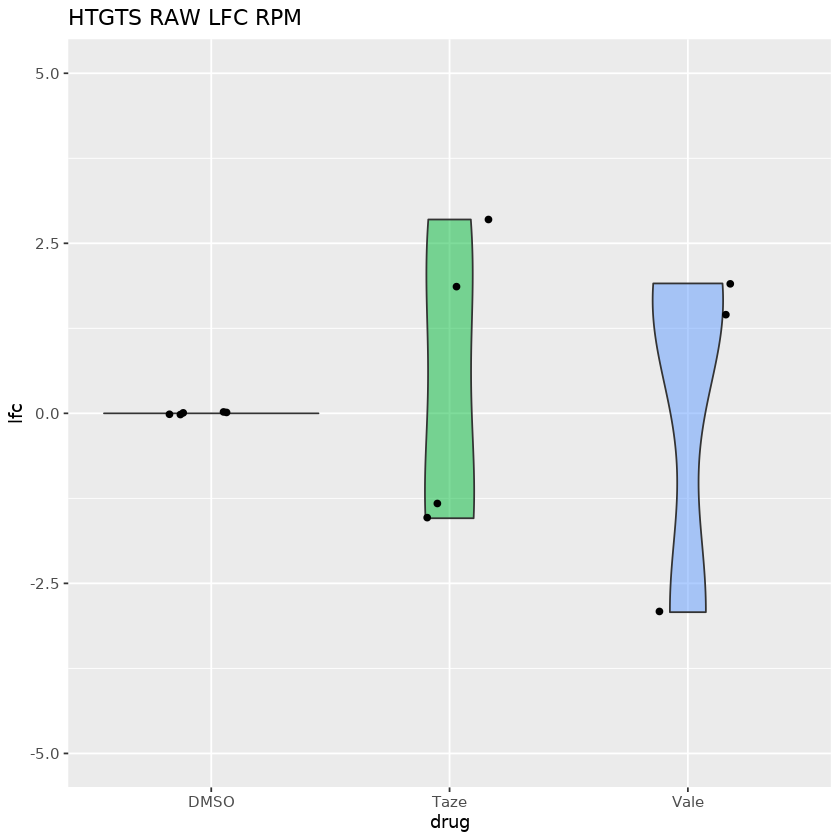

In [14]:
#FULL RAW
foldChange=list()
foldChange[[1]]=log2((rbind(mj2[[1]],mj2[[2]],mj2[[3]])[,2]+0.000001)/(rbind(mj2[[1]],mj2[[2]],mj2[[3]])[,1]+0.000001))
foldChange[[2]]=log2((rbind(mj2[[4]],mj2[[5]],mj2[[6]])[,2]+0.000001)/(rbind(mj2[[4]],mj2[[5]],mj2[[6]])[,1]+0.000001))
    names(foldChange)=c(colnames(mj2[[1]])[2],colnames(mj2[[4]])[2])
    lim=max(abs(foldChange[[1]]),abs(foldChange[[2]]))
    foldChangeDF=cbind(foldChange[[1]],rep("Taze",length(foldChange[[1]])))
foldChangeDF=rbind(foldChangeDF,cbind(foldChange[[2]],rep("Vale",length(foldChange[[2]]))))
foldChangeDF=rbind(foldChangeDF,cbind(0,rep("DMSO",length(unique(c(names(foldChange[[1]]),names(foldChange[[2]])))))))

colnames(foldChangeDF)=c("lfc","drug")
foldChangeDF=data.frame(foldChangeDF)
foldChangeDF$lfc=as.numeric(foldChangeDF$lfc)

pp=ggplot(foldChangeDF,aes(x=drug,y=lfc,fill=drug)) +
geom_violin(alpha = 0.5) +
geom_point(position = position_jitter(seed = 1, width = 0.2)) +
theme(legend.position = "none") + ylim(-5,5) + ggtitle("HTGTS RAW LFC RPM")
#theme(legend.position = "none") + ggtitle("HTGTS RAW LFC RPM")
plot(pp)    

In [15]:
DMSOSpec=setdiff(setdiff(j2Filtered$DMSO,j2Filtered$Taze),j2Filtered$Vale)
TazeSpec = setdiff(setdiff(j2Filtered$Taze,j2Filtered$DMSO),j2Filtered$Vale)
ValeSpec = setdiff(setdiff(j2Filtered$Vale,j2Filtered$Taze),j2Filtered$DMSO)
common=intersect(intersect(j2Filtered$DMSO,j2Filtered$Taze),j2Filtered$Vale)
TazDMSO=setdiff(intersect(j2Filtered$DMSO,j2Filtered$Taze),j2Filtered$Vale)
DMSOVale=setdiff(intersect(j2Filtered$DMSO,j2Filtered$Vale),j2Filtered$Taze)
TazVale=setdiff(intersect(j2Filtered$Taze,j2Filtered$Vale),j2Filtered$DMSO)
a=as.matrix(read.table(paste(results,"rpm_hgtgtsHeatmap.csv",sep="/"),header=TRUE,row.names=1,sep=","))[unlist(j2Filtered),]+0.000001
yo=cbind(a[,2]/a[,1],a[,3]/a[,1])
colnames(yo)=c("Taze","Vale")
write.table(log10(yo),paste(results,"/rpmPlot/filtered/","/lfcBoxplot.txt",sep=""),sep=",",row.names=FALSE)
write.table(a[sapply(c(TazeSpec,TazVale,ValeSpec,common,TazDMSO,DMSOVale,DMSOSpec),toString),],paste(results,"rpmPlot/filtered/rpm_hgtgtsHeatmapDIVIDED.csv",sep="/"),col.names=NA,sep=",")

In [16]:
data=a[sapply(c(TazeSpec,TazVale,ValeSpec,common,TazDMSO,DMSOVale,DMSOSpec),toString),]
data2=read.table(paste(results,"/count_hgtgtsHeatmap.csv",sep=""),header=TRUE,row.names=1,sep=",")
data=data2[rownames(data),]
condition_of_interest = data[,2]
condition_of_interest2 = data[,3]
reference_condition <- data[,1]
pvalueTAZE= wilcox.test(condition_of_interest, reference_condition,paired=TRUE)$p.value
pvalueVALE= wilcox.test(condition_of_interest2, reference_condition,paired=TRUE)$p.value
  cat("P-value for","Taze Ligase4 KO", "vs DMSO Ligase4 KO is:",pvalueTAZE, "\n")
  cat("P-value for","Vale Ligase4 KO", "vs DMSO Ligase4 KO is:",pvalueVALE, "\n")


Warning message in wilcox.test.default(condition_of_interest, reference_condition, :
“cannot compute exact p-value with ties”


P-value for Taze Ligase4 KO vs DMSO Ligase4 KO is: 0.09751254 
P-value for Vale Ligase4 KO vs DMSO Ligase4 KO is: 0.25 


Warning message in .Seqinfo.mergexy(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr17
  - in 'y': chr1, chr3, chr12, chr11, chr6, chr10, chr4, chr9, chr19, chrY, chr18
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning).”
Warning message in .Seqinfo.mergexy(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr16, chr17
  - in 'y': chr1, chr3, chr13, chr12, chr11, chr6, chr10, chr14, chr2, chr4, chr9, chrY, chr18
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning).”


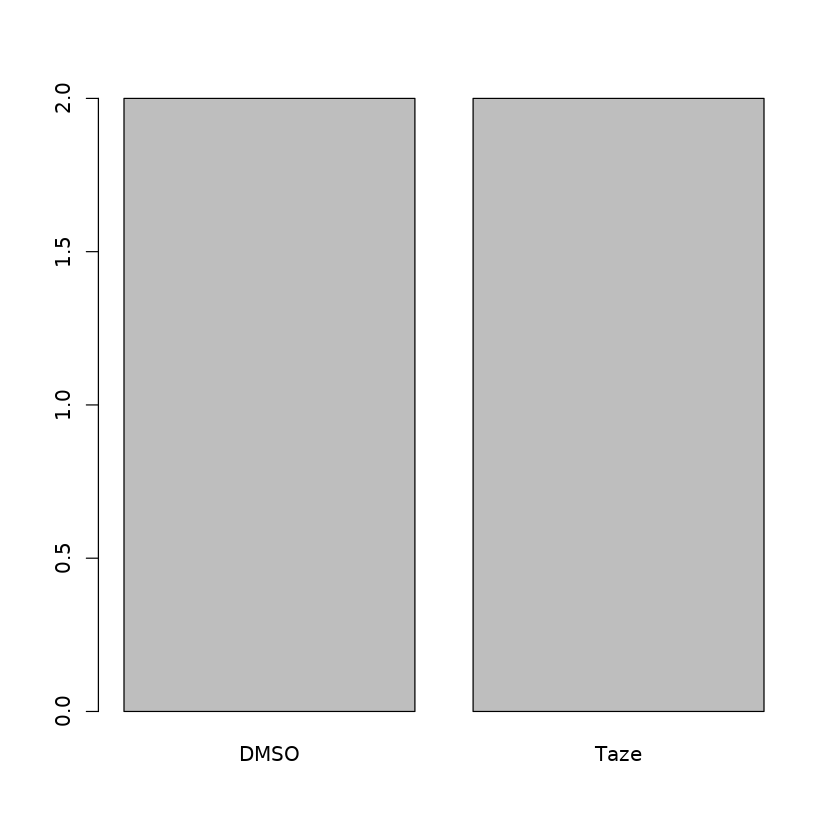

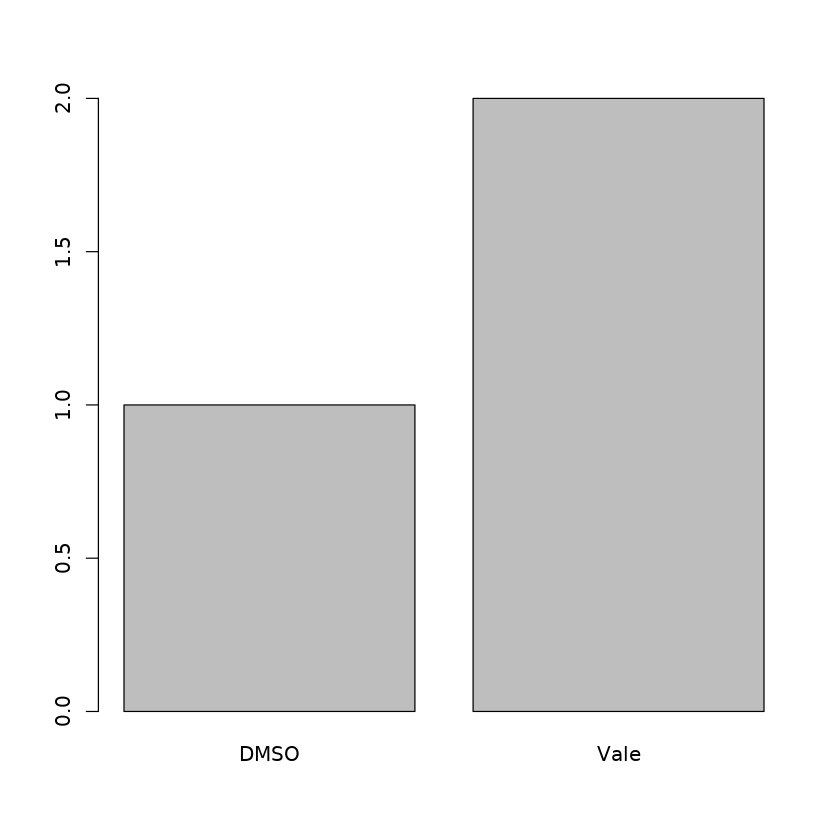

In [17]:
library(stringr)
boxy=c()
all_directories <- list.dirs(path = plots, recursive = FALSE)
matching_directories_increased <- all_directories[str_detect(all_directories, "_DMSO")]
matching_directories_decreased <- all_directories[str_detect(all_directories, "DMSO_")]
for(i in matching_directories_increased){
djNamessForever=c()
#DRUG!!!
compare=read.table(paste(i,"/",list.files(i,pattern="txt"),sep=""),header=TRUE,sep="\t")
compare=compare[compare[,16]<=0.05,c(2,3,4)]
tempGG=GRanges(seqnames=as.matrix(compare[,1]),ranges=IRanges(start = as.numeric(compare[,2]),end=as.numeric(compare[,3]))) 
first=length(unique(Database[findOverlaps(tempGG,gg)@to,7]))
djNamessForever=append(djNamessForever,strsplit(basename(i),"_")[[1]][1])
#DMSO!!!
i=matching_directories_decreased[grep(strsplit(basename(i),"_")[[1]][1],matching_directories_decreased)]
compare=read.table(paste(i,"/",list.files(i,pattern="txt"),sep=""),header=TRUE,sep="\t")
compare=compare[compare[,16]<=0.05,c(2,3,4)]
tempGG=GRanges(seqnames=as.matrix(compare[,1]),ranges=IRanges(start = as.numeric(compare[,2]),end=as.numeric(compare[,3]))) 
second=length(unique(Database[findOverlaps(tempGG,gg)@to,7]))
djNamessForever=append(djNamessForever,strsplit(basename(i),"_")[[1]][1])
plotMe=c(first,second)
names(plotMe)=djNamessForever
barplot(rev(plotMe))
write.table(rev(plotMe),paste(plots,"/",djNamessForever[[1]][1],"_barplot.csv",sep=""),col.names=FALSE)    
}

[1] "/sharedFolder/Results/Hotspot/Revision1/Idelalisib/FULL/rpmPlot//Taze_DMSO"

Warning message in .Seqinfo.mergexy(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr17
  - in 'y': chr1, chr3, chr12, chr11, chr6, chr10, chr4, chr9, chr19, chrY, chr18
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning).”


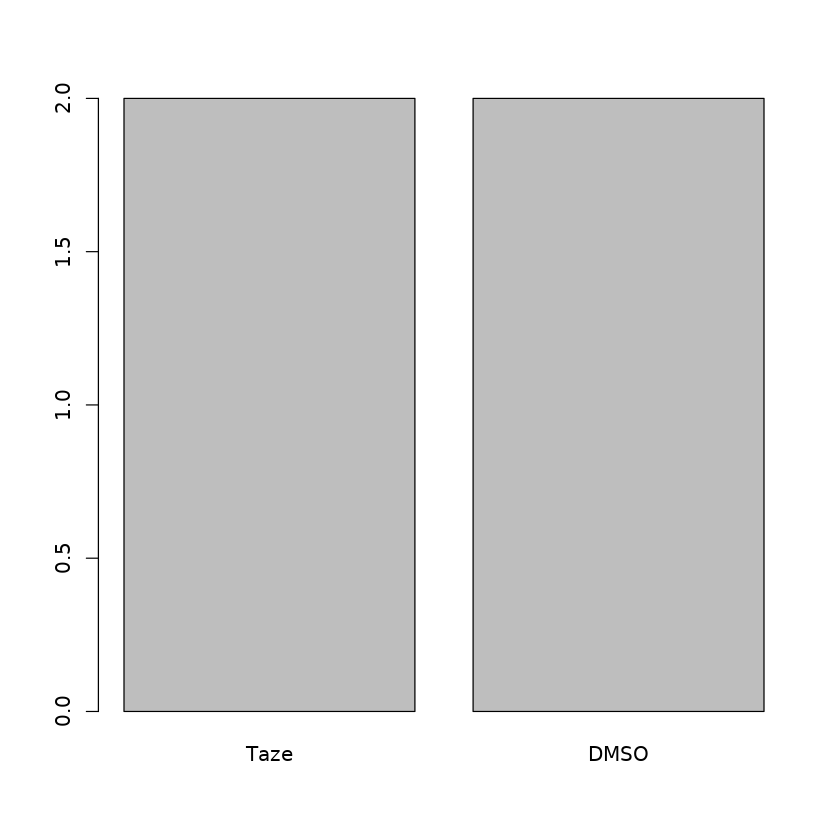

In [18]:
i =matching_directories_increased[1]
i
djNamessForever=c()
#DRUG!!!
compare=read.table(paste(i,"/",list.files(i,pattern="txt"),sep=""),header=TRUE,sep="\t")
compare=compare[compare[,16]<=0.05,c(2,3,4)]
tempGG=GRanges(seqnames=as.matrix(compare[,1]),ranges=IRanges(start = as.numeric(compare[,2]),end=as.numeric(compare[,3]))) 
first=length(unique(Database[findOverlaps(tempGG,gg)@to,7]))
djNamessForever=append(djNamessForever,strsplit(basename(i),"_")[[1]][1])
#DMSO!!!
i=matching_directories_decreased[grep(strsplit(basename(i),"_")[[1]][1],matching_directories_decreased)]
compare=read.table(paste(i,"/",list.files(i,pattern="txt"),sep=""),header=TRUE,sep="\t")
compare=compare[compare[,16]<=0.05,c(2,3,4)]
tempGG=GRanges(seqnames=as.matrix(compare[,1]),ranges=IRanges(start = as.numeric(compare[,2]),end=as.numeric(compare[,3]))) 
second=length(unique(Database[findOverlaps(tempGG,gg)@to,7]))
djNamessForever=append(djNamessForever,strsplit(basename(i),"_")[[1]][1])
plotMe=c(first,second)
names(plotMe)=djNamessForever
barplot(plotMe)

In [19]:
second

[1] 2

[1] "/sharedFolder/Results/Hotspot/Revision1/Idelalisib/FULL/rpmPlot//Vale_DMSO"

Warning message in .Seqinfo.mergexy(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr16, chr17
  - in 'y': chr1, chr3, chr13, chr12, chr11, chr6, chr10, chr14, chr2, chr4, chr9, chrY, chr18
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning).”


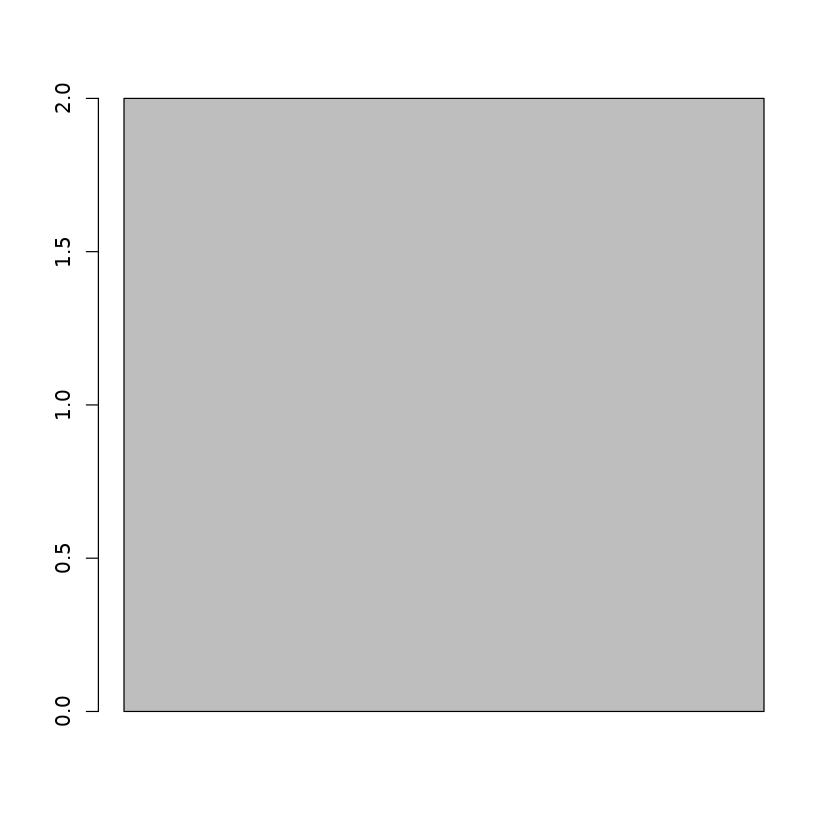

In [20]:
i =matching_directories_increased[2]
i
#DRUG!!!
compare=read.table(paste(i,"/",list.files(i,pattern="txt"),sep=""),header=TRUE,sep="\t")
compare=compare[compare[,16]<=0.05,c(2,3,4)]
tempGG=GRanges(seqnames=as.matrix(compare[,1]),ranges=IRanges(start = as.numeric(compare[,2]),end=as.numeric(compare[,3]))) 
first=length(unique(Database[findOverlaps(tempGG,gg)@to,7]))
#DMSO!!!
i=matching_directories_decreased[grep(strsplit(basename(i),"_")[[1]][1],matching_directories_decreased)]
compare=read.table(paste(i,"/",list.files(i,pattern="txt"),sep=""),header=TRUE,sep="\t")
compare=compare[compare[,16]<=0.05,c(2,3,4)]
tempGG=GRanges(seqnames=as.matrix(compare[,1]),ranges=IRanges(start = as.numeric(compare[,2]),end=as.numeric(compare[,3]))) 
second=length(unique(Database[findOverlaps(tempGG,gg)@to,7]))
barplot(first,second)

In [21]:
first

[1] 2

In [22]:
second

[1] 1